In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
df=pd.read_csv("HeartAttack.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
in_feat = df.iloc[:,0:13]
print(in_feat.columns)

tar_feat = df.iloc[:,-1]
print(tar_feat)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
best_features=SelectKBest(score_func=chi2,k=7)

selector = best_features.fit(in_feat,tar_feat)

In [ ]:
dfcolumns =pd.DataFrame(in_feat.columns)
dfscores=pd.DataFrame(selector.scores_)
dfpvalues = pd.DataFrame(selector.pvalues_)

In [ ]:
feature_scores=pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
feature_scores.columns=['Features','Chi-2 Scores','p-values']

feature_scores

In [ ]:
print(feature_scores.nlargest(7,'Chi-2 Scores'))

   Features  Chi-2 Scores      p-values
7   thalach    188.320472  7.395102e-43
9   oldpeak     72.644253  1.552583e-17
11       ca     66.440765  3.605677e-16
2        cp     62.598098  2.534982e-15
8     exang     38.914377  4.428074e-10
4      chol     23.936394  9.957148e-07
0       age     23.286624  1.395673e-06


In [ ]:
print('Number of input features:',selector.n_features_in_)
print('Input features Names',selector.feature_names_in_)
print('output features Names:',selector.get_feature_names_out())

Number of input features: 13
Input features Names ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']
output features Names: ['age' 'cp' 'chol' 'thalach' 'exang' 'oldpeak' 'ca']


In [ ]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
X=df.drop(columns=['sex','trestbps','fbs','restecg','slope','thal','target'])
y=df['target']
print(X)
print(y)

     age  cp  chol  thalach  exang  oldpeak  ca
0     63   3   233      150      0      2.3   0
1     37   2   250      187      0      3.5   0
2     41   1   204      172      0      1.4   0
3     56   1   236      178      0      0.8   0
4     57   0   354      163      1      0.6   0
..   ...  ..   ...      ...    ...      ...  ..
298   57   0   241      123      1      0.2   0
299   45   3   264      132      0      1.2   0
300   68   0   193      141      0      3.4   2
301   57   0   131      115      1      1.2   1
302   57   1   236      174      0      0.0   1

[303 rows x 7 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=133)

print("X_train data samples:",X_train.shape)
print("X_test data sample:",X_test.shape)
print("y_train data samples:",y_train.shape)
print("y_test data samples:",y_test.shape)





X_train data samples: (212, 7)
X_test data sample: (91, 7)
y_train data samples: (212,)
y_test data samples: (91,)


In [ ]:
from sklearn import svm

model_name = svm.SVC(kernel="linear",gamma ='auto',C = 2)
model_name.fit(X_train,y_train)

y_predict = model_name.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        37
           1       0.85      0.87      0.86        54

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



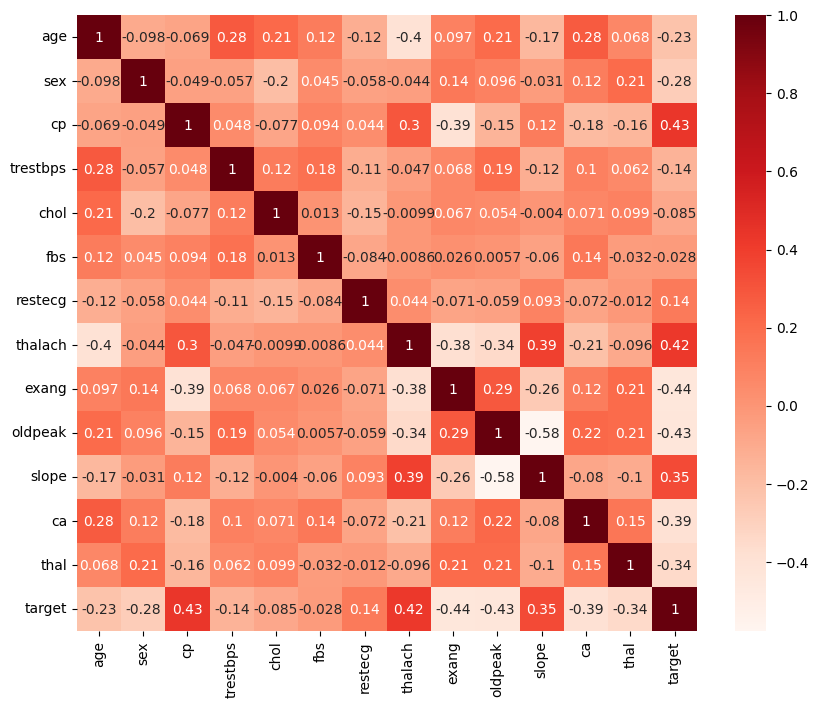

In [ ]:
import seaborn  as sns
plt.figure(figsize=(10,8))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target= abs(cor["target"])
relevant_features  = cor_target[cor_target>0.4]
relevant_features

cp         0.433798
thalach    0.421741
exang      0.436757
oldpeak    0.430696
target     1.000000
Name: target, dtype: float64